<a href="https://colab.research.google.com/github/robinjacobroy/Odonates/blob/master/YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd "/content/gdrive/My Drive/Odonata_data/YOLO/darknet-master/"



/content/gdrive/My Drive/Odonata_data/YOLO/darknet-master


In [0]:
#!cp ../yolov3-odonata.cfg .

In [0]:
#!find . -type f -mtime -.208 -exec rm -- {} +

In [0]:
#!mv train_field2/* darknet-master/data/odonata/

In [0]:
#!for file in *.txt ; do mv $file ${file//(1)/_1} ; done

In [0]:
#!ls data/odonata/ | wc -l

2722


In [0]:
cp ../Makefile .

In [0]:
#!cmake . && make
!make

chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:228:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
gcc -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: 

In [0]:
# if make command worked properly this should show "usage: ./darknet <function>""
!./darknet

usage: ./darknet <function>


In [0]:
#!ls data/odonata/*.jpg >train.txt

In [0]:
#!wget https://pjreddie.com/media/files/yolov3-openimages.weights

--2019-08-28 13:03:51--  https://pjreddie.com/media/files/yolov3-openimages.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259229388 (247M) [application/octet-stream]
Saving to: ‘yolov3-openimages.weights’

yolov3-openimages.w 100%[===================>] 247.22M  3.81MB/s    in 2m 54s  

2019-08-28 13:06:46 (1.42 MB/s) - ‘yolov3-openimages.weights’ saved [259229388/259229388]



In [0]:
#!mv train.txt data/
#!mv test.txt data/

In [0]:
#!mv backup/ backup_good/

In [0]:
%pycat data/odonata.data


In [0]:
#to start training with imagenet pretraind weight
!./darknet detector train data/odonata.data yolov3-odonata.cfg darknet53.conv.74 -map >train.log

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
#to continue training from the weights of 1000th epoch
!./darknet detector train data/odonata.data yolov3-odonata.cfg backup/yolov3-odonata_1000.weights >> train.log

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
#prediction on a single image
!./darknet detector test data/odonata.data yolov3-odonata-test.cfg backup/yolov3-odonata_final.weights 000000387352.jpg

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
#creating a list of untrained data for prediction
#!ls ../predict/*.jpg > list.txt

In [0]:
#!ls ../predict_final/*.jpg > list_f.txt

In [0]:
#view the created list
%pycat list_f.txt

In [0]:
!mkdir results_aug30_imagenet

In [0]:
#run prediction on a list of images
fname=open('list.txt')
for i,line in enumerate(fname):
  
  x=line.rpartition("/")[-1]
  !./darknet detector test data/odonata.data yolov3-odonata-test.cfg backup/yolov3-odonata_best.weights $line 
  !cp predictions.jpg results_aug30/$x
  if i==100:
    break
fname.close()

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
ls predict_on_trained/ |wc -l

101


In [0]:

!ls -lt

total 179453
-rw------- 1 root root    204954 Aug 16 06:55 predictions.jpg
drwx------ 2 root root      4096 Aug 16 06:31 predict_on_trained
-rw------- 1 root root   3511432 Aug 16 06:21 darknet
-rw------- 1 root root      4992 Aug 16 06:18 Makefile
drwx------ 2 root root      4096 Aug 15 20:30 results_aug16
-rw------- 1 root root      5018 Aug 15 20:29 list.txt
-rw------- 1 root root       860 Aug 15 20:25 bad.list
-rw------- 1 root root  17356254 Aug 15 18:01 train.log
-rw------- 1 root root      8329 Aug 15 17:35 yolov3-odonata.cfg
drwx------ 2 root root      4096 Aug 15 10:31 backup
drwx------ 2 root root      4096 Aug 15 10:05 weights_old
drwx------ 2 root root      4096 Aug 10 18:14 results
-rw------- 1 root root      8406 Aug 10 10:17 yolov3-odonata-test.cfg
drwx------ 2 root root      4096 Aug  9 07:51 obj
-rw------- 1 root root     20019 Aug  9 06:06 CMakeLists.txt
-rw------- 1 root root     52260 Aug  9 06:06 README.md
-rw------- 1 root root      8265 Aug  9 06:06 build.ps1
-r

Retrieving data and plotting training loss graph...
Done! Plot saved as training_loss_plot.png


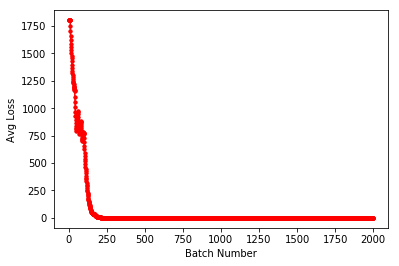

In [0]:
import sys
import matplotlib.pyplot as plt

lines = []
for line in open("train.log"):
    if "avg" in line:
        lines.append(line)

iterations = []
avg_loss = []

print('Retrieving data and plotting training loss graph...')
for i in range(len(lines)):
    lineParts = lines[i].split(',')
    iterations.append(int(lineParts[0].split(':')[0]))
    avg_loss.append(float(lineParts[1].split()[0]))

fig = plt.figure()
for i in range(0, len(lines)):
    plt.plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-')

plt.xlabel('Batch Number')
plt.ylabel('Avg Loss')
fig.savefig('training_loss_plot.png', dpi=1000)

print('Done! Plot saved as training_loss_plot.png')


In [0]:
!./darknet detector map data/odonata.data yolov3-odonata.cfg backup/yolov3-odonata_3000.weights

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
!./darknet detector map data/odonata.data yolov3-odonata.cfg backup/yolov3-odonata_final.weights


   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
!./darknet detector map data/odonata.data yolov3-odonata.cfg backup/yolov3-odonata_2000.weights

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
!./darknet detector map data/odonata.data yolov3-odonata.cfg backup/yolov3-odonata_1000.weights

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
!./darknet detector map data/odonata.data yolov3-odonata.cfg backup/yolov3-odonata_best.weights

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5